Load dataset and feature names

In [1]:
import pandas as pd

properties      = pd.read_table('kddcup.names',sep=':',skiprows=1,header=None)
names           = list(properties[0])
names.append('type_of_intrusion')

X               = pd.read_table('kddcup.data.gz',header=None,sep=',')
X.columns       = names

Create additional variable with target values

In [2]:
y = X['type_of_intrusion']
X.drop('type_of_intrusion',axis=1,inplace=True)

Check for missing values

In [3]:
print('Dataset missing values: ',pd.isnull(X).sum().sum())
print('Target variable missing values: ',pd.isnull(y).sum().sum())

Dataset missing values:  0
Target variable missing values:  0


Check variables' types

In [4]:
print('Variable type summary dataset:')
print(X.dtypes.value_counts())

Variable type summary dataset:
int64      23
float64    15
object      3
dtype: int64


Dataset shape

In [5]:
print('Dataset has {0} rows and {1} columns'.format(X.shape[0],X.shape[1]))

Dataset has 4898431 rows and 41 columns


Dataset sampling

In [6]:
from sklearn.model_selection import train_test_split

X, _, y, _ = train_test_split(X,y,train_size=0.1,test_size=0.0,random_state=0)

Sampled dataset shape

In [7]:
print('Dataset has {0} rows and {1} columns'.format(X.shape[0],X.shape[1]))

Dataset has 489843 rows and 41 columns


Dataset summary

In [8]:
pd.options.display.max_columns = 42
X.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,489843.000000,4.898430e+05,4.898430e+05,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.0,489843.0,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000
mean,49.335177,8.691964e+02,1.460165e+03,0.000006,0.000678,0.000002,0.012473,0.000041,0.144089,0.008164,0.000053,0.000041,0.012708,0.001339,0.000071,0.001039,0.0,0.0,0.000853,334.703819,294.789702,0.178571,0.178584,0.057708,0.057793,0.788980,0.021396,0.028435,233.023089,189.073905,0.753003,0.030827,0.603829,0.006416,0.178662,0.178437,0.058014,0.057733
std,728.749012,2.634879e+04,5.721041e+05,0.002475,0.043614,0.001429,0.467709,0.009260,0.351180,1.943122,0.007285,0.008573,2.159640,0.136592,0.008923,0.036997,0.0,0.0,0.029199,211.979615,246.071258,0.382384,0.382718,0.232334,0.232775,0.389925,0.083645,0.140826,63.927761,106.001808,0.411635,0.108759,0.481336,0.041169,0.382327,0.382643,0.231115,0.231094
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,120.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42888.000000,7.248552e+06,4.002911e+08,1.000000,3.000000,1.000000,44.000000,5.000000,1.000000,809.000000,1.000000,2.000000,889.000000,36.000000,2.000000,7.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Transform string/factor features

In [9]:
from sklearn          import base

class Column_Selection(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_name=None):
        self.col_name = col_name 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.col_name]

In [10]:
class Dictionary_Encoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        result = []
        
        for i in X:
            temp = {}
            if i != None:
                temp[i] = 1
                    
            result.append(temp)
            
        return result

In [11]:
from sklearn.feature_extraction import DictVectorizer

class Dictionary_Vectorizer(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        self.dv = DictVectorizer(sparse=False)
        result  = self.dv.fit_transform(X)
        print(self.dv.feature_names_)
            
        return result

Create transformation pipeline and feature union

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

pt = Pipeline([
    ('selecting'  ,Column_Selection('protocol_type')),
    ('encoding'   ,Dictionary_Encoder()),
    ('vectorizing',Dictionary_Vectorizer()),
    ])

sv = Pipeline([
    ('selecting'  ,Column_Selection('service')),
    ('encoding'   ,Dictionary_Encoder()),
    ('vectorizing',Dictionary_Vectorizer()),
    ])

fl = Pipeline([
    ('selecting'  ,Column_Selection('flag')),
    ('encoding'   ,Dictionary_Encoder()),
    ('vectorizing',Dictionary_Vectorizer()),
    ])

all_features = FeatureUnion([
        ('protocol_type',pt),
        ('service',sv),
        ('flag',fl) 
    ])

In [13]:
one_hot = all_features.fit_transform(X)

['icmp', 'tcp', 'udp']
['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']


Create a pandas dataframe, include names of features

In [16]:
feature_names = ['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 
                 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data',
                 'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 
                 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
                 'other', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 
                 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path',
                 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

In [17]:
one_hot = pd.DataFrame(one_hot,index=X.index,columns=feature_names)

Concatenate the two dataframes and remove redundant variables

In [18]:
X = pd.concat([X,one_hot],axis=1)
X.drop('protocol_type',axis=1,inplace=True)
X.drop('service',axis=1,inplace=True)
X.drop('flag',axis=1,inplace=True)
del(one_hot)

Remove zero variance variables

In [19]:
from sklearn.feature_selection import VarianceThreshold    

vt      = VarianceThreshold(threshold=0)
vt.fit(X)
columns = X.columns[vt.get_support()]
index   = X.index
X       = vt.transform(X)
X       = pd.DataFrame(X,columns=columns,index=index)

MISSING DATA

Correlation Histogram

In [20]:
import numpy             as np
corr = X.corr()

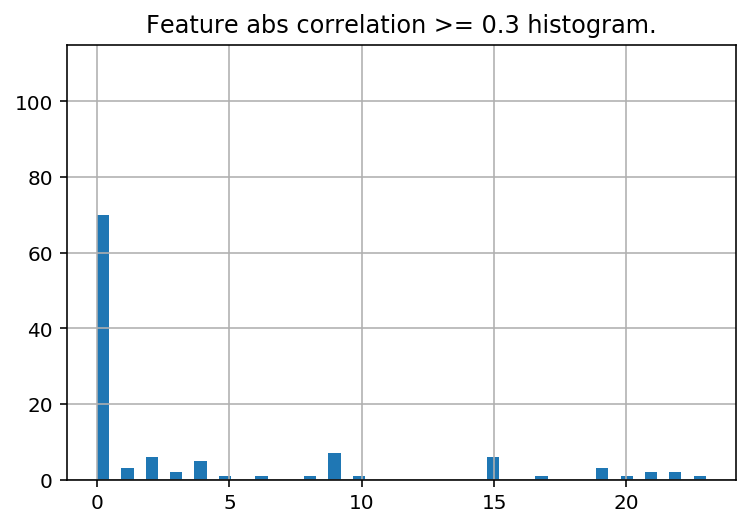

In [21]:
from ipywidgets          import interact
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144

def plot_hist(f=0.3):
    ((abs(corr)>=f).sum()-1).hist(bins=50)
    plt.ylim(0,115)
    plt.title('Feature abs correlation >= {0} histogram.'.format(f))
    plt.show()

interact(plot_hist,f=(0.0,1.0,0.05),corr=corr)

Target Counts

In [25]:
y.value_counts()


smurf.              280313
neptune.            107596
normal.              97334
satan.                1614
ipsweep.              1240
portsweep.            1056
nmap.                  226
back.                  226
teardrop.              102
warezclient.            94
pod.                    30
guess_passwd.            4
land.                    3
loadmodule.              2
spy.                     1
buffer_overflow.         1
warezmaster.             1
Name: type_of_intrusion, dtype: int64

PCA

In [20]:
from sklearn.decomposition import PCA

n = 2

pca     = PCA(n_components=n,whiten=True)
X_pca   = pca.fit_transform(X)

Data Preprocessing

In [28]:
print('One-hot encoded features: {0}'.format(len(feature_names)))
print('Other features: {0}'.format(X.shape[1]-len(feature_names)))

One-hot encoded features: 77
Other features: 36


In [29]:
X.ix[:,:36].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,489843.000000,4.898430e+05,4.898430e+05,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000
mean,49.335177,8.691964e+02,1.460165e+03,0.000006,0.000678,0.000002,0.012473,0.000041,0.144089,0.008164,0.000053,0.000041,0.012708,0.001339,0.000071,0.001039,0.000853,334.703819,294.789702,0.178571,0.178584,0.057708,0.057793,0.788980,0.021396,0.028435,233.023089,189.073905,0.753003,0.030827,0.603829,0.006416,0.178662,0.178437,0.058014,0.057733
std,728.749012,2.634879e+04,5.721041e+05,0.002475,0.043614,0.001429,0.467709,0.009260,0.351180,1.943122,0.007285,0.008573,2.159640,0.136592,0.008923,0.036997,0.029199,211.979615,246.071258,0.382384,0.382718,0.232334,0.232775,0.389925,0.083645,0.140826,63.927761,106.001808,0.411635,0.108759,0.481336,0.041169,0.382327,0.382643,0.231115,0.231094
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42888.000000,7.248552e+06,4.002911e+08,1.000000,3.000000,1.000000,44.000000,5.000000,1.000000,809.000000,1.000000,2.000000,889.000000,36.000000,2.000000,7.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Outliers

In [ ]:
from math                  import log1p
from sklearn.preprocessing import MinMaxScaler

X2 = pd.DataFrame(columns=X.columns,index=X.index)

for col in X2.columns:
    X2[col] = MinMaxScaler().fit_transform(X[col].apply(log1p))


In [44]:
X2.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,...,supdup,systat,telnet,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
count,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,...,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000,489843.000000
mean,0.009803,0.313335,0.058310,0.000006,0.000237,0.000002,0.000762,0.000014,0.144089,0.000092,0.000053,0.000021,0.000246,0.000126,0.000044,0.000332,0.000853,0.809059,0.712550,0.178753,0.178671,...,0.000239,0.000233,0.000886,0.000269,0.000033,0.001096,0.000237,0.000241,0.000202,0.000192,0.000024,0.054893,0.001100,0.000020,0.001696,0.178149,0.000114,0.000022,0.000008,0.763773,0.000198
std,0.078566,0.180282,0.132817,0.002475,0.014847,0.001429,0.020605,0.002604,0.351180,0.005055,0.007285,0.004425,0.008670,0.007069,0.005410,0.010926,0.029199,0.298506,0.344425,0.382412,0.382730,...,0.015453,0.015254,0.029753,0.016413,0.005715,0.033092,0.015387,0.015519,0.014215,0.013851,0.004949,0.227772,0.033153,0.004518,0.041153,0.382638,0.010692,0.004739,0.002858,0.424763,0.014071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.240984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.768763,0.384381,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.396026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999687,0.999687,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.439357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
del(X)

Test and validation sets

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2,y,train_size=0.5,test_size=0.5,random_state=0)
X_test, X_val, y_test, y_val     = train_test_split(X_test,y_test,train_size=0.5,test_size=0.5,random_state=0)

In [47]:
del(X2)

UNBALANCED DATA

Feature Selection

In [64]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, SelectKBest
from sklearn.ensemble          import ExtraTreesClassifier as ETC

def feature_selection(model,train,target,valtrain,valtest,n=1):
    #side = train.shape[1]
    predictions = pd.DataFrame(data=np.zeros(shape=(n,1)),columns=['m_i_class'],index=range(1,n+1))  
    
    #for i in range(1,side+1):
    for i in range(1,n+1):
        clf_m = SelectKBest(mutual_info_classif,k=i)
        df_m  = clf_m.fit(train,target)
        df_m  = df_m.transform(train)
        df_v  = df_m.transform(valtrain)

        clf                            = model
        clf.fit(df_m,target)
        pred                           = clf.predict(df_v)
        predictions['m_i_class'].ix[i] = np.mean(pred==valtest)
        
    return predictions

In [69]:
clf = ETC(n_jobs=2,random_state=0)
clf.fit(X_train,y_train)
np.mean(clf.predict(X_val)==y_val)

0.99976318991352353

Variance Inflation

In [80]:
pd.DataFrame(clf.feature_importances_,
             index=X_val.columns,columns=['feat_importance']).sort_values(by='feat_importance',ascending=False).head()

,feat_importance
dst_host_same_src_port_rate,0.225450
icmp,0.200055
dst_host_serror_rate,0.090130
tcp,0.065744
src_bytes,0.065418


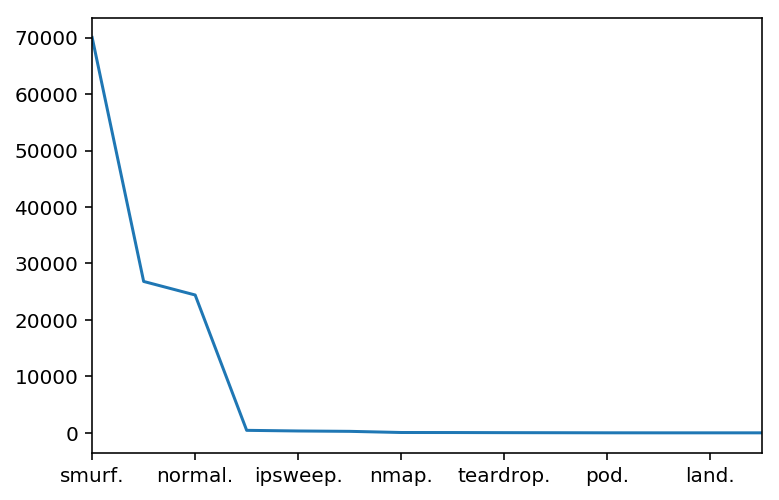

In [92]:
np.sum(pd.DataFrame(clf.predict_proba(X_val),index=X_val.index,columns=clf.classes_)).sort_values(ascending=False).plot()
plt.show()

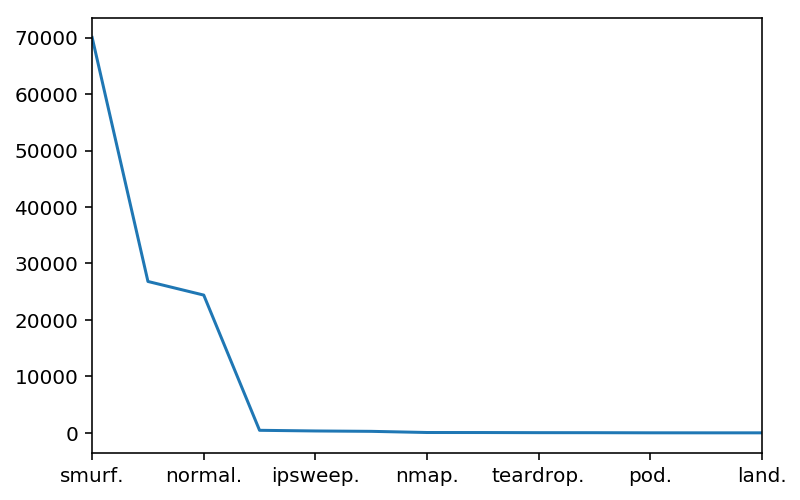

In [93]:
y_val.value_counts().plot()
plt.show()

User:
- Id
- Location (part of hospital)
- Ip address?
- Shift (work time)
- Type (Admin, Doctor, Nurse)
- Type of medicine

Stats:
- time of interaction
- type of interaction (read, write)
- ammount of interaction (# of times, #data)
- type of data read (vip, out of specialization)

patient:
- id
- location
- status (vip,regular)
- in hospital?

In [233]:
log = pd.DataFrame(logs,columns=['user_id','patient_id','ip_address','date_time','access_type','data_read'])

In [231]:
logs = []
logs.append(['user1','patient1','192.168.0.1',datetime.datetime.now(),'r',512])
logs.append(['user2','patient2','192.168.1.1',datetime.datetime.now(),'r',1024])
logs.append(['user3','patient3','192.168.2.1',datetime.datetime.now(),'w',512])
logs.append(['user1','patient4','192.168.3.1',datetime.datetime.now(),'w',128])
logs.append(['user2','patient1','192.168.0.1',datetime.datetime.now(),'w',512])
logs.append(['user3','patient2','192.168.1.1',datetime.datetime.now(),'r',2048])
logs.append(['user1','patient3','192.168.2.1',datetime.datetime.now(),'w',512])
logs.append(['user2','patient4','192.168.3.1',datetime.datetime.now(),'w',512])
logs.append(['user3','patient1','192.168.0.1',datetime.datetime.now(),'r',0])
logs.append(['user1','patient2','192.168.1.1',datetime.datetime.now(),'r',512])
logs.append(['user2','patient3','192.168.2.1',datetime.datetime.now(),'w',64])
logs.append(['user3','patient4','192.168.3.1',datetime.datetime.now(),'r',512])

In [234]:
log

,user_id,patient_id,ip_address,date_time,access_type,data_read
0,user1,patient1,192.168.0.1,2017-03-11 12:33:48.291998,r,512
1,user2,patient2,192.168.1.1,2017-03-11 12:33:48.292761,r,1024
2,user3,patient3,192.168.2.1,2017-03-11 12:33:48.293095,w,512
3,user1,patient4,192.168.3.1,2017-03-11 12:33:48.296442,w,128
4,user2,patient1,192.168.0.1,2017-03-11 12:33:48.297246,w,512
5,user3,patient2,192.168.1.1,2017-03-11 12:33:48.297430,r,2048
6,user1,patient3,192.168.2.1,2017-03-11 12:33:48.297567,w,512
7,user2,patient4,192.168.3.1,2017-03-11 12:33:48.297701,w,512
8,user3,patient1,192.168.0.1,2017-03-11 12:33:48.297861,r,0
9,user1,patient2,192.168.1.1,2017-03-11 12:33:48.297994,r,512


In [235]:
users = []

users.append(['user1','oncology','morning','doctor'])
users.append(['user2','oncology','night','doctor'])
users.append(['user3','cardiology','night','nurse'])

patients = []
patients.append(['patient1','oncology','regular','yes'])
patients.append(['patient2','cardiology','regular','yes'])
patients.append(['patient3','emergency','vip','yes'])
patients.append(['patient4','oncology','regular','no'])

user = pd.DataFrame(users,columns=['user_id','location','shift','type'])
patient = pd.DataFrame(patients,columns=['patient_id','location','type','in_hospital'])

In [241]:
patient

,patient_id,location,type,in_hospital
0,patient1,oncology,regular,yes
1,patient2,cardiology,regular,yes
2,patient3,emergency,vip,yes
3,patient4,oncology,regular,no


In [200]:
import time
from datetime import date
today = date.today()

In [202]:
today.ctime()

'Sat Mar 11 00:00:00 2017'

In [206]:
import datetime
datetime.datetime.now()

datetime.datetime(2017, 3, 11, 12, 24, 32, 324755)

In [250]:
import networkx as nx
G = nx.DiGraph(name='Hospital')

for i in user.values:
    G.add_node(i[0],location=i[1],shift=i[2],type_=i[3])
    
for i in patient.values:
    G.add_node(i[0],location=i[1],type_=i[2],in_hospital=i[3])

In [251]:
for i in log.values:
    G.add_edge(i[0],i[1],weight=np.random.random())
    

In [252]:
for i in user.values:
    print(i)

['user1' 'oncology' 'morning' 'doctor']
['user2' 'oncology' 'night' 'doctor']
['user3' 'cardiology' 'night' 'nurse']


In [254]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

In [253]:
G.edges(data=True)

[('user1', 'patient1', {'weight': 0.018544651255940847}),
 ('user1', 'patient4', {'weight': 0.3075205135609934}),
 ('user1', 'patient2', {'weight': 0.07487810427761932}),
 ('user1', 'patient3', {'weight': 0.6281759279011073}),
 ('user3', 'patient1', {'weight': 0.9966090744413475}),
 ('user3', 'patient4', {'weight': 0.943370064848196}),
 ('user3', 'patient2', {'weight': 0.04004092005743276}),
 ('user3', 'patient3', {'weight': 0.4687967222952293}),
 ('user2', 'patient1', {'weight': 0.6426538123401085}),
 ('user2', 'patient4', {'weight': 0.9072309661101252}),
 ('user2', 'patient3', {'weight': 0.11346722497427963}),
 ('user2', 'patient2', {'weight': 0.9099067128832045})]

In [ ]:
import matplotlib.pyplot as plt


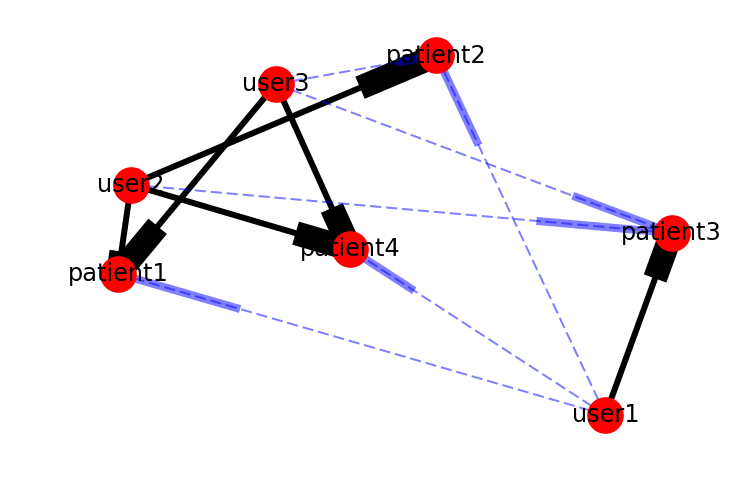

In [257]:
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=300)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=3)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=12,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [95]:
len(np.unique(y_train))

14

In [158]:
from keras.models              import Sequential
from keras.layers              import Dense, Activation

class nn(object):
    def __init__(self,input_dim=113,categories=17):
        self.model      = Sequential()
        self.input_dim  = input_dim 
        self.categories = categories
    
        self.model.add(Dense(256,input_dim=self.input_dim))
        self.model.add(Activation('relu'))
        self.model.add(Dense(128))
        self.model.add(Activation('relu'))
        self.model.add(Dense(64))
        self.model.add(Activation('relu'))
        self.model.add(Dense(self.categories))
        self.model.add(Activation('softmax'))
        self.model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
        
    def fit(self,X_train,y_train,batch_size,nb_epoch,shuffle=True):
        self.model.fit(X_train,y_train,batch_size=batch_size,nb_epoch=nb_epoch,shuffle=shuffle)
              
    def evaluate(self,X_test,y_test,verbose=1):
        return self.model.evaluate(X_test,y_test,verbose=verbose)
    
    def predict(self,X_test,batch_size,verbose=0):
        return self.model.predict(X_test,batch_size=batch_size,verbose=verbose)

In [182]:
categories = np.unique(y_train.append(y_test).append(y_val))

cat_dict = {}
count    = 0
for i in categories:
    cat_dict.update({i:count})
    count += 1

In [184]:
y_train_oh = np.zeros(shape=(len(y_train),len(categories)))
y_test_oh  = np.zeros(shape=(len(y_test),len(categories)))
y_val_oh   = np.zeros(shape=(len(y_val),len(categories)))

In [196]:
for i in range(y_train_oh.shape[0]):
    y_train_oh[i,cat_dict[y_train.values[i]]] = 1
    
for i in range(y_test_oh.shape[0]):
    y_test_oh[i,cat_dict[y_test.values[i]]] = 1
    
for i in range(y_val_oh.shape[0]):
    y_val_oh[i,cat_dict[y_val.values[i]]] = 1

In [197]:
validation_data=(X_val,y_val_oh)
nn_clf = nn()
nn_clf.fit(X_train=X_train,y_train=y_train_oh,batch_size=128,nb_epoch=5)

Epoch 1/5


IndexError: indices are out-of-bounds

Outlier / Novelty detection

Date values

Network of places/patients/doctors/time

Clusterings

Network

In [ ]:
import xes